### 나이브 베이즈 (Naive Bayes)
- 확률 기반 머신러닝 분류 알고리즘의 대표적
- 나이브 베이즈 분류 알고리즘은 데이터를 나이브(단순) 하게 독립적인 사건(조건)으로 가정 - 이 독립 사건들을 베이즈 이론에 대입시켜 가장 높은 확률 레이블로 분류를 실행하는 알고리즘        


![nn](images/3.png)

#### 베이즈 이론
p(A|B) = p(B|A) * p(A) / p(B)
P(A|B) : 어떤 사건 B가 일어났을 때 사건 A가 일어날 확률     
p(B|A) : 어떤 사건 A가 일어났을 때 사건 B가 일어날 확률

- 나이브 베이즈 알고리즘을 머신러닝에 응용하기
p(L|F) = p(F|L) * p(L) / p(F)
- 확률 기반 머신러닝

<img src="images/4.png" width=400 height=500></img>

p(주문|저녁) = p(저녁|주문) * p(주문) / p(저녁)

In [65]:
(3/4) * (4/10) / (5/10)

0.6000000000000001

# ensemble
- 여러개의 분류 모델을 조합해서 더 나은 성능을 내는 방법

In [66]:
# RandomForest : 의사결정나무를 단일 모델 조합해서 예측을 실행하는 모델
from sklearn import datasets
import numpy as np
np.random.seed(5)

In [67]:
# 손글씨 데이터
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

In [68]:
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [69]:
# 의사결정나무를 이용한 10번의 교차 검증 10번 실시 => 정확도를 보기 위해서
from sklearn import tree
from sklearn.model_selection import cross_val_score

cv_scores = []
cv = tree.DecisionTreeClassifier()

for i in range(10):
    score = cross_val_score(cv, features, labels, cv=10, scoring='accuracy')
    cv_scores.append(score.mean())
    
cv_scores

[0.8280229671011794,
 0.8235630043451273,
 0.8224674115456239,
 0.8235692116697703,
 0.8341464928615766,
 0.8185692116697704,
 0.8241247672253259,
 0.8180136561142148,
 0.8235630043451272,
 0.8258038485412786]

In [70]:
# randomforest를 이용한 10번의 교차 검증 10번 실시 => 정확도를 보기 위해서
from sklearn.ensemble import RandomForestClassifier


rf_scores = []
rf = RandomForestClassifier()

for i in range(10):
    score = cross_val_score(rf, features, labels, cv=10, scoring='accuracy')
    rf_scores.append(score.mean())
    
rf_scores

[0.9526939788950962,
 0.9487957790192427,
 0.9510211049037863,
 0.9549286157666046,
 0.9471322160148976,
 0.9487988826815641,
 0.952122905027933,
 0.9454531346989447,
 0.9460180012414648,
 0.9471322160148976]

In [71]:
def cross_validation(classifier, features, labels):
    cv_scores=[]
    for i in range(10):
        score = cross_val_score(classifier, features, labels, cv=10, scoring='accuracy')
        cv_scores.append(score.mean())
    return cv_scores

In [72]:
# 의사결정 나무
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)
dt_cv_scores

[0.8330509000620733,
 0.8224736188702669,
 0.8268963376784605,
 0.8246710117939168,
 0.825788330229671,
 0.821880819366853,
 0.833584729981378,
 0.8280167597765363,
 0.826340782122905,
 0.8235816263190564]

In [73]:
# RandomForest
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)
rf_cv_scores

[0.9504655493482307,
 0.9410117939168219,
 0.9510211049037863,
 0.9549162011173185,
 0.9504469273743016,
 0.9449130974549969,
 0.9510117939168218,
 0.9493513345747981,
 0.9488081936685286,
 0.9471198013656114]

### RandomForest와 의사결정나무의 정확도의 시각화

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

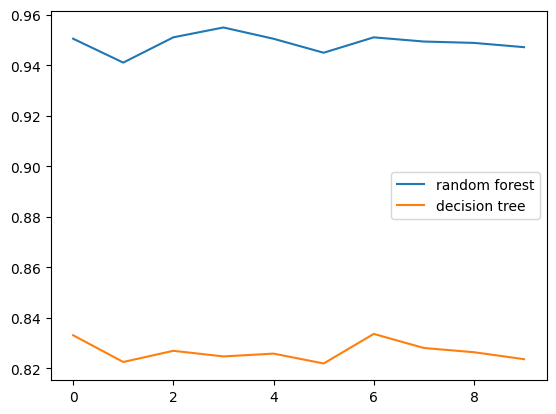

In [75]:
cv_list = {'random forest': rf_cv_scores, 'decision tree': dt_cv_scores}
df = pd.DataFrame(cv_list)
df.plot()
plt.show()

### 보팅(Voting) 앙상블
: 단일 모델을 앙상블하여 더 나은 예측을 하는 모델 생성

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [78]:
# 1) 단일 모델 정확도 측정
# 의사 결정 나무
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.8638888888888889

In [79]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
knn.score(X_test, y_test)

0.9805555555555555

In [80]:
# SVM
from sklearn.svm import SVC
svm = SVC(probability=True).fit(X_train, y_train)       #probablity=True (뒤에 소프트보팅 때문에 필요하다)
svm.score(X_test, y_test)

0.9861111111111112

2) 하드보팅     
: 각각의 분류기의 예측값들을 모아, 가장 많은 득표를 받은 예측값으로 최종 결론을 내는 방식

In [81]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('decision_tree', dtree), ('KNN', knn), ('SVM', svm)],
    weights=[1,1,1],
    voting='hard',
).fit(X_train, y_train)

voting_clf.score(X_test, y_test)

0.9861111111111112

3) 소프트 보팅      
: 각각의 분류모델을 활용하여 모든 분류값들의 확률들을 더해서 가장 높은 점수를 획득한 분류값으로 최종 결론을 내는 방식

In [82]:
voting_clf = VotingClassifier(
    estimators=[('decision_tree', dtree), ('KNN', knn), ('SVM', svm)],
    weights=[1,1,1],
    voting='soft',
).fit(X_train, y_train)

voting_clf.score(X_test, y_test)

0.9833333333333333

### 군집화(Clustering)
- 비지도학습으로 정답없이, 특징만 가지고 있는 데이터로 모델을 구현

### 문제 정의   
:키와 몸무게로 학생들을 3그룹으로 분류

In [83]:
import warnings
warnings.filterwarnings('ignore')

In [84]:
import pandas as pd
df = pd.read_csv("../Data/student_kmeans.csv")
df.head()

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68


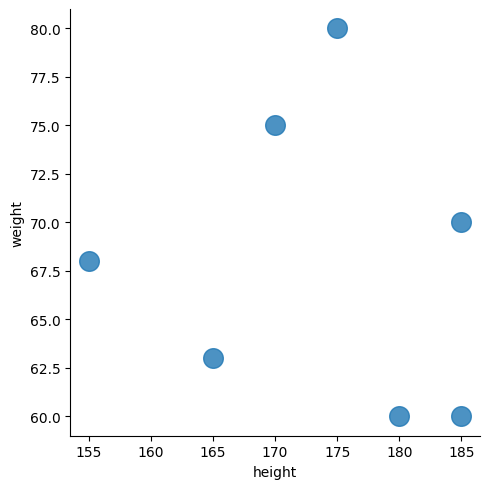

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='height', y='weight',
           data=df, fit_reg=False,
           scatter_kws={'s':200}
)
plt.show()

In [86]:
df.values       # array: numpy

array([[185,  60],
       [180,  60],
       [185,  70],
       [165,  63],
       [155,  68],
       [170,  75],
       [175,  80]])

In [87]:
from sklearn.cluster import KMeans
data_points = df.values
kmeans = KMeans(n_clusters=4).fit(data_points)

In [88]:
# 각 군집의 중심위치        _가 있는 메소드는 시스템에서 제공하는 메소드다.
kmeans.cluster_centers_

array([[185. ,  70. ],
       [160. ,  65.5],
       [172.5,  77.5],
       [182.5,  60. ]])

In [89]:
kmeans.labels_

array([3, 3, 0, 1, 1, 2, 2], dtype=int32)

In [90]:
# 데이터가 어느 군집에 소속되어 있는지 정하기
df['cluster_id'] = kmeans.labels_
df.head()

,height,weight,cluster_id
0,185,60,3
1,180,60,3
2,185,70,0
3,165,63,1
4,155,68,1


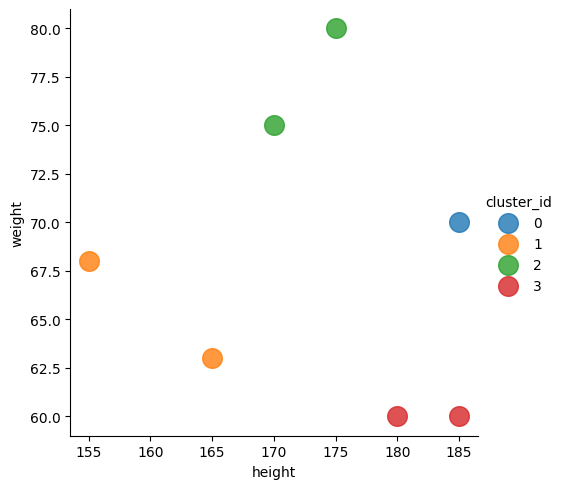

In [91]:
sns.lmplot(x='height', y='weight',
           data=df, fit_reg=False,
           scatter_kws={'s':200},
           hue = 'cluster_id'   # 종류별로 분류해준다.  
           #4가지로 분류하고 싶으면 위에 kmeans = KMeans(n_clusters=3).fit(data_points)여기서 4로 바꿈
)
plt.show()

---
### Iris

In [118]:
iris = pd.read_csv("../Data/iris.csv")

In [119]:
iris['label'] = iris['Name'].map({'Iris-setosa':0,"Iris-versicolor":1, "Iris-virginica":2})
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2


In [120]:
iris2 = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
iris2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [121]:
data_points = iris2.values
kmeans = KMeans(n_clusters=3).fit(data_points)

In [122]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [123]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [124]:
iris['cluster_id'] = kmeans.labels_
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1


In [125]:
# label과 cluster_id 번호가 안맞다.
iris.iloc[[1, 51, 102], :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
51,6.4,3.2,4.5,1.5,Iris-versicolor,1,0
102,7.1,3.0,5.9,2.1,Iris-virginica,2,2


In [126]:
iris.cluster_id = iris.cluster_id + 5
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0,6
1,4.9,3.0,1.4,0.2,Iris-setosa,0,6
2,4.7,3.2,1.3,0.2,Iris-setosa,0,6
3,4.6,3.1,1.5,0.2,Iris-setosa,0,6
4,5.0,3.6,1.4,0.2,Iris-setosa,0,6


In [127]:
iris.iloc[[1, 51, 102], :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
1,4.9,3.0,1.4,0.2,Iris-setosa,0,6
51,6.4,3.2,4.5,1.5,Iris-versicolor,1,5
102,7.1,3.0,5.9,2.1,Iris-virginica,2,7


In [128]:
iris.cluster_id[iris['cluster_id'] == 6] = 0
iris.cluster_id[iris['cluster_id'] == 7] = 1
iris.cluster_id[iris['cluster_id'] == 5] = 2

In [137]:
iris.iloc[[1, 51, 102], :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
51,6.4,3.2,4.5,1.5,Iris-versicolor,1,2
102,7.1,3.0,5.9,2.1,Iris-virginica,2,1


In [138]:
iris.label[iris['cluster_id'] == 0] = 0
iris.label[iris['cluster_id'] == 1] = 1
iris.label[iris['cluster_id'] == 2] = 2

In [139]:
iris.iloc[[1, 51, 102], :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
51,6.4,3.2,4.5,1.5,Iris-versicolor,2,2
102,7.1,3.0,5.9,2.1,Iris-virginica,1,1


In [140]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.label, iris.cluster_id)

1.0

In [ ]:
# sns.lmplot('SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',
#            data=iris2, fit_reg=False,
#            scatter_kws={'s':100},
#            hue = 'label'   # 종류별로 분류해준다.  
#            #4가지로 분류하고 싶으면 위에 kmeans = KMeans(n_clusters=3).fit(data_points)여기서 4로 바꿈
# )
# plt.show()

TypeError: lmplot() got multiple values for argument 'data'